# **Maldición de dimensionalidad**
**José Barrios - 20007192**

**Descripción de presentación**: Desarrollemos el siguiente ejemplo: para 1 variable, 2 variables, y 3 variables ¿Cuántos polinomios de grado 3 pueden generarse?


**Objetivo**: Determinar cómo crece la cantidad de _features_ conforme aumentamos el grado del modelo y las interacciones entre las variables.

## Desarrollo del análisis
Se creará un dataset sin datos (filas), unicamente con columnas ya que analizaremos el crecimiento de features conforme aumentamos el grado del polinomio con sklearn.

In [17]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [11]:
data = pd.DataFrame(columns=['Dia', 'Mes', 'Anio'])
data = data.fillna(0)
data = data.append({'Dia' : 1 , 'Mes' : 1, 'Anio': 2020} , ignore_index=True)

In [4]:
print('Cantidad de features: ' + str(data.shape[1]))

Cantidad de features: 3


Diseñamos un ciclo que evalue las features polinomiales

In [20]:
tabla_grados = pd.DataFrame(columns=['Grado', 'Cantidad'])
tabla_grados = tabla_grados.fillna(0)

for grado in range(1, 40):
    cantidad_features = PolynomialFeatures(grado).fit_transform(data).shape[1]
    tabla_grados = tabla_grados.append({'Grado': grado , 'Cantidad': cantidad_features} , ignore_index=True)
    print("Grado: " + str(grado) + ", Features: " + str(cantidad_features))

Grado: 1, Features: 4
Grado: 2, Features: 10
Grado: 3, Features: 20
Grado: 4, Features: 35
Grado: 5, Features: 56
Grado: 6, Features: 84
Grado: 7, Features: 120
Grado: 8, Features: 165
Grado: 9, Features: 220
Grado: 10, Features: 286
Grado: 11, Features: 364
Grado: 12, Features: 455
Grado: 13, Features: 560
Grado: 14, Features: 680
Grado: 15, Features: 816
Grado: 16, Features: 969
Grado: 17, Features: 1140
Grado: 18, Features: 1330
Grado: 19, Features: 1540
Grado: 20, Features: 1771
Grado: 21, Features: 2024
Grado: 22, Features: 2300
Grado: 23, Features: 2600
Grado: 24, Features: 2925
Grado: 25, Features: 3276
Grado: 26, Features: 3654
Grado: 27, Features: 4060
Grado: 28, Features: 4495
Grado: 29, Features: 4960
Grado: 30, Features: 5456
Grado: 31, Features: 5984
Grado: 32, Features: 6545
Grado: 33, Features: 7140
Grado: 34, Features: 7770
Grado: 35, Features: 8436
Grado: 36, Features: 9139
Grado: 37, Features: 9880
Grado: 38, Features: 10660
Grado: 39, Features: 11480


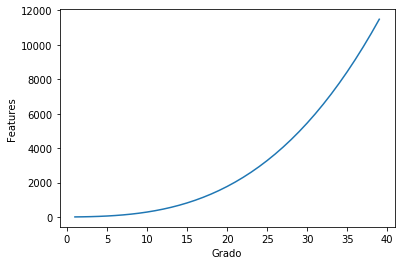

In [21]:
plt.plot(tabla_grados['Grado'], tabla_grados['Cantidad'])
plt.ylabel('Features')
plt.xlabel('Grado')
plt.show()

Notamos un crecimiento muy acelerado. En menos de un grado 20 se han pasado las mil features, por lo que es necesario tomar en cuenta la complejidad computacional que conlleva el usar _PolynomialFeatures_ y analizar si es necesario recurrir a disminución de dimensionalidad en problemas que tengan gran cantidad de variables.